# Data Wrangling

# Introduction

This step focuses on collecting your data, organizing it, and making sure it's well defined. Paying attention to these tasks will pay off greatly later on. Some data cleaning can be done at this stage, but it's important not to be overzealous in your cleaning before you've explored the data to better understand it.

Data Science Problem
The purpose of this data science project is to come up with a model that can predict the Economic index followed by their demogrpahics. A lot of teenagers and adults in NYC suffers from lack of education and poverty which makes people concern about the future. Billionaire Elon Musk tweeted, not for the first time, that “population collapse due to low birth rates is a much bigger risk to civilization than global warming.”

It is crucial to maximize people to become educated for future sake.

This project aims to build a predictive model for Economic index based on school demographics in NYC. This model will be used to provide guidance for NYC's education system plan and aim to decrease economic indexes by borough.

# Additional information about columns

• Schools with a higher Economic Needs Index also tended to have the lowest graduation rates, while the converse was also true.

• The Economic Need Index measures thesocioeconomic circumstances of a school’s population and assigns a score to each school based onthe number of students eligible for free lunch or public assistance or who live in temporary housing. A higher score indicates that more students are eligible for these programs or live in temporary housing causing less education.  


In [323]:
# 2.1 Contents
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import re
from pathlib import Path

Read file

In [324]:
def read_file():
    df = pd.read_csv('../data/School.csv')
    df_2 = pd.read_csv('../data/W_School.csv')
    return df, df_2

df,df_2 = read_file()

In [325]:
df.head(10)

,DBN,School Name,Year,Total Enrollment,Grade 3K+PK (Half Day & Full Day),Grade K,Grade 1,Grade 2,Grade 3,Grade 4,...,% White,# Missing Race/Ethnicity Data,% Missing Race/Ethnicity Data,# Students with Disabilities,% Students with Disabilities,# English Language Learners,% English Language Learners,# Poverty,% Poverty,Economic Need Index
0,01M015,P.S. 015 Roberto Clemente,2016-17,178,17,28,33,27,31,24,...,0.022,0,0.000,51,0.287,12,0.067,152,85.4%,88.2%
1,01M015,P.S. 015 Roberto Clemente,2017-18,190,17,28,32,33,23,31,...,0.032,0,0.000,49,0.258,8,0.042,161,84.7%,89.0%
2,01M015,P.S. 015 Roberto Clemente,2018-19,174,13,20,33,30,30,20,...,0.034,0,0.000,39,0.224,8,0.046,147,84.5%,88.8%
3,01M015,P.S. 015 Roberto Clemente,2019-20,190,14,29,28,38,33,29,...,0.047,0,0.000,46,0.242,17,0.089,155,81.6%,86.7%
4,01M015,P.S. 015 Roberto Clemente,2020-21,193,17,29,29,27,30,32,...,0.057,0,0.000,43,0.223,21,0.109,158,81.9%,85.6%
5,01M019,P.S. 019 Asher Levy,2016-17,271,24,37,46,47,40,43,...,0.055,0,0.000,88,0.325,9,0.033,207,76.4%,57.8%
6,01M019,P.S. 019 Asher Levy,2017-18,257,13,34,38,42,46,42,...,0.062,0,0.000,90,0.350,8,0.031,198,77.0%,67.9%
7,01M019,P.S. 019 Asher Levy,2018-19,249,10,30,39,43,41,44,...,0.072,0,0.000,102,0.410,8,0.032,183,73.5%,68.7%
8,01M019,P.S. 019 Asher Levy,2019-20,236,16,25,27,39,45,42,...,0.081,0,0.000,94,0.398,8,0.034,176,74.6%,70.4%
9,01M019,P.S. 019 Asher Levy,2020-21,212,13,23,25,27,38,44,...,0.080,3,0.014,83,0.392,9,0.042,151,71.2%,69.0%


In [326]:
df_2.head()

,Administrative District,Year,Total Enrollment,Grade 3K+PK (Half Day & Full Day),Grade K,Grade 1,Grade 2,Grade 3,Grade 4,Grade 5,...,% White,# Missing Race/Ethnicity Data,% Missing Race/Ethnicity Data,# Students with Disabilities,% Students with Disabilities,# English Language Learners,% English Language Learners,# Poverty,% Poverty,Economic Need Index
0,1,2016-17,11772,827,850,907,889,859,834,808,...,0.175,27,0.002,2555,0.217,1065,0.090,7265,0.617,0.597
1,1,2017-18,11632,800,851,846,854,862,839,813,...,0.174,29,0.002,2528,0.217,1016,0.087,7682,0.660,0.670
2,1,2018-19,11376,759,799,850,816,838,839,832,...,0.180,38,0.003,2597,0.228,966,0.085,7314,0.643,0.661
3,1,2019-20,11506,960,812,782,848,813,818,831,...,0.179,126,0.011,2593,0.225,919,0.080,7419,0.645,0.677
4,1,2020-21,11021,832,728,762,746,787,775,788,...,0.181,101,0.009,2455,0.223,915,0.083,6960,0.632,0.663


In [327]:
# we are going to the see the summary of the data by using .info()
df.head()

,DBN,School Name,Year,Total Enrollment,Grade 3K+PK (Half Day & Full Day),Grade K,Grade 1,Grade 2,Grade 3,Grade 4,...,% White,# Missing Race/Ethnicity Data,% Missing Race/Ethnicity Data,# Students with Disabilities,% Students with Disabilities,# English Language Learners,% English Language Learners,# Poverty,% Poverty,Economic Need Index
0,01M015,P.S. 015 Roberto Clemente,2016-17,178,17,28,33,27,31,24,...,0.022,0,0.0,51,0.287,12,0.067,152,85.4%,88.2%
1,01M015,P.S. 015 Roberto Clemente,2017-18,190,17,28,32,33,23,31,...,0.032,0,0.0,49,0.258,8,0.042,161,84.7%,89.0%
2,01M015,P.S. 015 Roberto Clemente,2018-19,174,13,20,33,30,30,20,...,0.034,0,0.0,39,0.224,8,0.046,147,84.5%,88.8%
3,01M015,P.S. 015 Roberto Clemente,2019-20,190,14,29,28,38,33,29,...,0.047,0,0.0,46,0.242,17,0.089,155,81.6%,86.7%
4,01M015,P.S. 015 Roberto Clemente,2020-21,193,17,29,29,27,30,32,...,0.057,0,0.0,43,0.223,21,0.109,158,81.9%,85.6%


I will be working on df first.

In [328]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9169 entries, 0 to 9168
Data columns (total 43 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   DBN                                9169 non-null   object 
 1   School Name                        9169 non-null   object 
 2   Year                               9169 non-null   object 
 3   Total Enrollment                   9169 non-null   int64  
 4   Grade 3K+PK (Half Day & Full Day)  9169 non-null   int64  
 5   Grade K                            9169 non-null   int64  
 6   Grade 1                            9169 non-null   int64  
 7   Grade 2                            9169 non-null   int64  
 8   Grade 3                            9169 non-null   int64  
 9   Grade 4                            9169 non-null   int64  
 10  Grade 5                            9169 non-null   int64  
 11  Grade 6                            9169 non-null   int64

In [329]:
df.isnull().sum()

DBN                                  0
School Name                          0
Year                                 0
Total Enrollment                     0
Grade 3K+PK (Half Day & Full Day)    0
Grade K                              0
Grade 1                              0
Grade 2                              0
Grade 3                              0
Grade 4                              0
Grade 5                              0
Grade 6                              0
Grade 7                              0
Grade 8                              0
Grade 9                              0
Grade 10                             0
Grade 11                             0
Grade 12                             0
# Female                             0
% Female                             0
# Male                               0
% Male                               0
# Asian                              0
% Asian                              0
# Black                              0
% Black                  

In [330]:
missing = pd.concat([df.isnull().sum(), 100*df.isnull().mean()], axis=1)
missing.columns=['count', '%']
missing.sort_values(by=['count','%'], ascending= False)

,count,%
DBN,0,0.0
School Name,0,0.0
Year,0,0.0
Total Enrollment,0,0.0
Grade 3K+PK (Half Day & Full Day),0,0.0
Grade K,0,0.0
Grade 1,0,0.0
Grade 2,0,0.0
Grade 3,0,0.0
Grade 4,0,0.0


Sweet! we got no missing values for this data sheet.

# Categorical Features

In [331]:
df.select_dtypes('object')

,DBN,School Name,Year,# Poverty,% Poverty,Economic Need Index
0,01M015,P.S. 015 Roberto Clemente,2016-17,152,85.4%,88.2%
1,01M015,P.S. 015 Roberto Clemente,2017-18,161,84.7%,89.0%
2,01M015,P.S. 015 Roberto Clemente,2018-19,147,84.5%,88.8%
3,01M015,P.S. 015 Roberto Clemente,2019-20,155,81.6%,86.7%
4,01M015,P.S. 015 Roberto Clemente,2020-21,158,81.9%,85.6%
...,...,...,...,...,...,...
9164,84X730,Bronx Charter School for the Arts,2016-17,235,73.4%,84.0%
9165,84X730,Bronx Charter School for the Arts,2017-18,258,82.2%,89.1%
9166,84X730,Bronx Charter School for the Arts,2018-19,363,84.4%,88.8%
9167,84X730,Bronx Charter School for the Arts,2019-20,453,86.6%,89.2%


In [332]:
mask = df['# Poverty'].str.contains(pat = '[A-Za-z]',regex = True)
df[mask]['# Poverty'].unique()

array(['Above 95%', 'Below 5%'], dtype=object)

Let's see how we can convert these to numeric

So to calculate the percentage of poverty, it would be the following equation.

number of poverty / total samples * 100 = poverty rate

Based on this equation, we can estimate the number of poverty replacing the value 'Above 95%' and 'Below 5%'

In [333]:
df['% Poverty'] = df['% Poverty'].str.replace('Above 95%','95.0%')
df['% Poverty'] = df['% Poverty'].str.replace('Below 5%','95.0%')

In [334]:
df[df['% Poverty'] == 'Below 95%']

,DBN,School Name,Year,Total Enrollment,Grade 3K+PK (Half Day & Full Day),Grade K,Grade 1,Grade 2,Grade 3,Grade 4,...,% White,# Missing Race/Ethnicity Data,% Missing Race/Ethnicity Data,# Students with Disabilities,% Students with Disabilities,# English Language Learners,% English Language Learners,# Poverty,% Poverty,Economic Need Index


Sweet! There's no more

In [335]:
df['% Poverty'] = df['% Poverty'].str.replace('%','')

After we get rid of the precent signs, we can calculate the # of poverty and store it in the original '# Poverty' column

In [336]:
df['% Poverty'] = df['% Poverty'].astype(float)
df['Total Enrollment'] = df['Total Enrollment'].astype(float)

In [337]:
df['# Poverty'] = df['% Poverty']/100 * df['Total Enrollment']

In [338]:
df['# Poverty'].value_counts()

421.800    6
322.050    6
250.800    6
263.150    6
460.750    6
          ..
188.000    1
175.216    1
234.768    1
300.300    1
540.864    1
Name: # Poverty, Length: 8323, dtype: int64

In [339]:
df.head(10)

,DBN,School Name,Year,Total Enrollment,Grade 3K+PK (Half Day & Full Day),Grade K,Grade 1,Grade 2,Grade 3,Grade 4,...,% White,# Missing Race/Ethnicity Data,% Missing Race/Ethnicity Data,# Students with Disabilities,% Students with Disabilities,# English Language Learners,% English Language Learners,# Poverty,% Poverty,Economic Need Index
0,01M015,P.S. 015 Roberto Clemente,2016-17,178.0,17,28,33,27,31,24,...,0.022,0,0.000,51,0.287,12,0.067,152.012,85.4,88.2%
1,01M015,P.S. 015 Roberto Clemente,2017-18,190.0,17,28,32,33,23,31,...,0.032,0,0.000,49,0.258,8,0.042,160.930,84.7,89.0%
2,01M015,P.S. 015 Roberto Clemente,2018-19,174.0,13,20,33,30,30,20,...,0.034,0,0.000,39,0.224,8,0.046,147.030,84.5,88.8%
3,01M015,P.S. 015 Roberto Clemente,2019-20,190.0,14,29,28,38,33,29,...,0.047,0,0.000,46,0.242,17,0.089,155.040,81.6,86.7%
4,01M015,P.S. 015 Roberto Clemente,2020-21,193.0,17,29,29,27,30,32,...,0.057,0,0.000,43,0.223,21,0.109,158.067,81.9,85.6%
5,01M019,P.S. 019 Asher Levy,2016-17,271.0,24,37,46,47,40,43,...,0.055,0,0.000,88,0.325,9,0.033,207.044,76.4,57.8%
6,01M019,P.S. 019 Asher Levy,2017-18,257.0,13,34,38,42,46,42,...,0.062,0,0.000,90,0.350,8,0.031,197.890,77.0,67.9%
7,01M019,P.S. 019 Asher Levy,2018-19,249.0,10,30,39,43,41,44,...,0.072,0,0.000,102,0.410,8,0.032,183.015,73.5,68.7%
8,01M019,P.S. 019 Asher Levy,2019-20,236.0,16,25,27,39,45,42,...,0.081,0,0.000,94,0.398,8,0.034,176.056,74.6,70.4%
9,01M019,P.S. 019 Asher Levy,2020-21,212.0,13,23,25,27,38,44,...,0.080,3,0.014,83,0.392,9,0.042,150.944,71.2,69.0%


Now we got to answer the following questions:
    • is DBN unique?
    • How many samples of school name and year do we have?

In [340]:
def unique_number_show(col):
    return df[col].nunique()

print('DBN:',unique_number_show('DBN')) 
print('School Name:',unique_number_show('School Name'))
print('Year:',unique_number_show('Year'))

DBN: 1879
School Name: 1870
Year: 5


The DBN or District Borough Number is the combination of the District Number, the letter code for the borough, and the number of the school. Every school in the NYC DOE has a District Borough Number.

But the amount of DBN and School Name aren't matching. Let's see why.

In [341]:
print("Unique District Number:", df['DBN'].astype(str).str[:2].nunique())

Unique District Number: 35


In [342]:
print("Unique Borough Number:", df['DBN'].astype(str).str[2].nunique())

Unique Borough Number: 5


In [343]:
df['DBN'].astype(str).str[2].value_counts()

K    2832
X    2217
Q    1925
M    1788
R     407
Name: DBN, dtype: int64

There are 5 boroughs in NYC in total. 

1.Manhattan = M 

2.Bronx = X

3.Brooklyn = K 

4.Queens = Q 

5. Staten Island = R?

Im not sure if R really means staten island. Let's do some external research for schools that contains R as their Borough and see if those schools are located in staten Island

In [344]:
mask = df['DBN'].astype(str).str[2] == 'R'
df[mask].head()

,DBN,School Name,Year,Total Enrollment,Grade 3K+PK (Half Day & Full Day),Grade K,Grade 1,Grade 2,Grade 3,Grade 4,...,% White,# Missing Race/Ethnicity Data,% Missing Race/Ethnicity Data,# Students with Disabilities,% Students with Disabilities,# English Language Learners,% English Language Learners,# Poverty,% Poverty,Economic Need Index
7147,31R001,P.S. 001 Tottenville,2016-17,497.0,36,74,60,86,77,82,...,0.797,0,0.0,152,0.306,31,0.062,187.866,37.8,29.3%
7148,31R001,P.S. 001 Tottenville,2017-18,465.0,35,61,71,62,84,73,...,0.759,0,0.0,134,0.288,31,0.067,183.210,39.4,36.2%
7149,31R001,P.S. 001 Tottenville,2018-19,446.0,36,67,61,67,61,83,...,0.760,0,0.0,107,0.240,21,0.047,181.968,40.8,35.8%
7150,31R001,P.S. 001 Tottenville,2019-20,442.0,36,68,68,60,61,66,...,0.740,0,0.0,113,0.256,22,0.050,167.076,37.8,34.0%
7151,31R001,P.S. 001 Tottenville,2020-21,390.0,32,53,63,63,58,58,...,0.705,0,0.0,93,0.238,17,0.044,143.910,36.9,34.0%


School name P.S.001 Tottenville is a school in Staten Island. Great! We confirmed that label R is Staten Island.

In [345]:
df['Borough'] = df['DBN'].astype(str).str[2]

In [346]:
camp = {'M':'Manhattan','X':'Bronx', 'K':'Brooklyn', 'Q':'Queens','R':'Staten Island'}

df['Borough'] = df['Borough'].map(camp)

In [347]:
df['Borough'].value_counts()

Brooklyn         2832
Bronx            2217
Queens           1925
Manhattan        1788
Staten Island     407
Name: Borough, dtype: int64

We see an another column with Borough names. 

After External Research, I also figured out the District Number which is the first two digit in the DBN column, is as following, 

1~6 belongs to Manhattan

7~12 belongs to Bronx

13 ~ 23 belongs to Brooklyn

24 ~ 30 belongs to Queens

31 belongs to Staten Island

Cite: https://teachnyc.zendesk.com/hc/en-us/articles/360053601831-What-is-a-DBN-District-Borough-Number-

Let's make a new column District Number.

In [348]:
df['District Number'] = df['DBN'].astype(str).str[:2]

Also another column for School Number

In [349]:
df['School Number'] = df['DBN'].astype(str).str[4:6]

Now everything is pretty much cleaned up. We have no get rid of the Percentage signs as well for future analysis(also convert it to float)

+ Drop the DBN COlumn

In [350]:
df.drop(['DBN'], axis=1, inplace= True)

In [351]:
#Clean Economic Need Inex column
df['Economic Need Index']=df['Economic Need Index'].str.replace('%','')
df['Economic Need Index'] = df['Economic Need Index'].str.replace('Above 95','95.0')
df['Economic Need Index'] = df['Economic Need Index'].str.replace('Below 5','5.0')
df['Economic Need Index'] = df['Economic Need Index'].astype(float)

Now let's continue to analyze the rest of the columns (Year and School name)

In [352]:
df.Year.value_counts()

2020-21    1878
2019-20    1862
2018-19    1833
2017-18    1808
2016-17    1788
Name: Year, dtype: int64

In [353]:
df['School Name'].value_counts()

New Visions Charter High School for Advanced Math     20
New Visions Charter High School for the Humanities    19
P.S. 253                                              10
P.S. 360                                              10
P.S. 376                                               9
                                                      ..
Lamad Academy Charter School                           1
Walkabout Bronx High School                            1
The East New York Arts and Civics High School          1
P.S. 938                                               1
Sunset School of Cultural Learning                     1
Name: School Name, Length: 1870, dtype: int64

In [354]:
df['Borough'].value_counts()

Brooklyn         2832
Bronx            2217
Queens           1925
Manhattan        1788
Staten Island     407
Name: Borough, dtype: int64

In [355]:
df['District Number'].value_counts().head()

84    1187
02     594
10     425
31     365
09     346
Name: District Number, dtype: int64

# Outliers 

In [356]:
df.describe()

,Total Enrollment,Grade 3K+PK (Half Day & Full Day),Grade K,Grade 1,Grade 2,Grade 3,Grade 4,Grade 5,Grade 6,Grade 7,...,% White,# Missing Race/Ethnicity Data,% Missing Race/Ethnicity Data,# Students with Disabilities,% Students with Disabilities,# English Language Learners,% English Language Learners,# Poverty,% Poverty,Economic Need Index
count,9169.000000,9169.000000,9169.000000,9169.000000,9169.000000,9169.000000,9169.000000,9169.000000,9169.000000,9169.000000,...,9169.000000,9169.000000,9169.000000,9169.000000,9169.000000,9169.000000,9169.000000,9169.000000,9169.000000,9169.000000
mean,585.955611,17.964336,42.770967,44.196859,44.303305,44.298397,44.197622,43.992257,43.195659,42.561893,...,0.120075,2.524376,0.003689,122.522303,0.233650,80.493620,0.137677,433.365623,76.470564,73.083172
std,477.226538,48.498976,49.799159,51.404563,52.081540,53.423370,54.509121,54.500713,88.214932,89.622156,...,0.176769,8.999338,0.009496,97.894632,0.158448,106.569319,0.140170,347.388499,19.293505,20.205806
min,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.990000,5.000000,5.000000
25%,320.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.015000,0.000000,0.000000,67.000000,0.161000,18.000000,0.045000,234.650000,70.600000,63.300000
50%,471.000000,0.000000,30.000000,32.000000,31.000000,29.000000,25.000000,22.000000,0.000000,0.000000,...,0.033000,0.000000,0.000000,99.000000,0.206000,44.000000,0.098000,353.028000,82.400000,79.200000
75%,687.000000,32.000000,75.000000,79.000000,79.000000,79.000000,79.000000,79.000000,65.000000,62.000000,...,0.144000,1.000000,0.003000,146.000000,0.257329,100.000000,0.181000,517.000000,90.400000,88.600000
max,6040.000000,1328.000000,344.000000,337.000000,330.000000,349.000000,376.000000,351.000000,771.000000,789.000000,...,0.945000,234.000000,0.137000,925.000000,1.000000,1168.000000,1.000000,3654.588000,95.000000,95.000000


In [357]:
#pairplot but takes too much time. Also, boxplot ... but too many features

Let's confirm that total enrollment equals to all the number of students 

• From grade k ~ 12 

• By Sex 

• By Race

In [358]:
df.head()

,School Name,Year,Total Enrollment,Grade 3K+PK (Half Day & Full Day),Grade K,Grade 1,Grade 2,Grade 3,Grade 4,Grade 5,...,# Students with Disabilities,% Students with Disabilities,# English Language Learners,% English Language Learners,# Poverty,% Poverty,Economic Need Index,Borough,District Number,School Number
0,P.S. 015 Roberto Clemente,2016-17,178.0,17,28,33,27,31,24,18,...,51,0.287,12,0.067,152.012,85.4,88.2,Manhattan,01,15
1,P.S. 015 Roberto Clemente,2017-18,190.0,17,28,32,33,23,31,26,...,49,0.258,8,0.042,160.930,84.7,89.0,Manhattan,01,15
2,P.S. 015 Roberto Clemente,2018-19,174.0,13,20,33,30,30,20,28,...,39,0.224,8,0.046,147.030,84.5,88.8,Manhattan,01,15
3,P.S. 015 Roberto Clemente,2019-20,190.0,14,29,28,38,33,29,19,...,46,0.242,17,0.089,155.040,81.6,86.7,Manhattan,01,15
4,P.S. 015 Roberto Clemente,2020-21,193.0,17,29,29,27,30,32,29,...,43,0.223,21,0.109,158.067,81.9,85.6,Manhattan,01,15


In [359]:
for i in range(len(df)):
    df.iloc[i,21:34:2].sum()

In [360]:
def check_if_grade_equalto_total_enrollment():
    counter =0
    for i in range(len(df)):
        result = df.iloc[i,3:17].sum() == df['Total Enrollment'].iloc[i]
        if result == False:
            counter += 1
    return counter
            
def check_if_sex_equalto_total_enrollment():
    counter =0
    for i in range(len(df)):
        result = df.iloc[i,17:21:2].sum() == df['Total Enrollment'].iloc[i]
        if result == False:
            counter += 1
    return counter
            
    
def check_if_race_equalto_total_enrollment():
    counter =0
    for i in range(len(df)):
        result = df.iloc[i,21:34:2].sum() == df['Total Enrollment'].iloc[i]
        if result == False:
            counter += 1
    return counter

In [361]:
print(check_if_grade_equalto_total_enrollment())
print(check_if_sex_equalto_total_enrollment())
print(check_if_race_equalto_total_enrollment())

0
55
0


It's saying thats some rows don't match. Total enrollment != # female + #male.
Let's see which rows have unequal sums.

In [362]:
unequal = []
for i in range(len(df)):
    if df.iloc[i,17:21:2].sum() != df['Total Enrollment'].iloc[i]:
        unequal.append(i)

unequal

[343,
 378,
 438,
 578,
 593,
 623,
 688,
 698,
 708,
 858,
 874,
 895,
 909,
 910,
 915,
 925,
 1058,
 1063,
 1209,
 1230,
 1456,
 2641,
 2701,
 2855,
 2856,
 2994,
 3368,
 3380,
 3412,
 3595,
 3672,
 3787,
 4173,
 4811,
 4816,
 5018,
 5028,
 5033,
 5038,
 5232,
 5243,
 5248,
 5601,
 6059,
 6067,
 6072,
 6077,
 6623,
 6638,
 7333,
 7418,
 7468,
 7483,
 7739,
 8188]

In [363]:
# Let's say for example, index 343.
print("Total number of enrollment:", df.iloc[343]['Total Enrollment'])

Total number of enrollment: 290.0


In [364]:
print("Total number of male:", df.iloc[343]['# Male'])
print("Total number of female:", df.iloc[343]['# Female'])

Total number of male: 203
Total number of female: 86


So We can see that there's some math error. But it isn't a big deal since it's only 1 single value apart. We can. just omit this.

So we proved that total enrollment matches the total of grades, total sex(female+male = total enrollment), and also race(Asian+ white+black...=total enrollment)

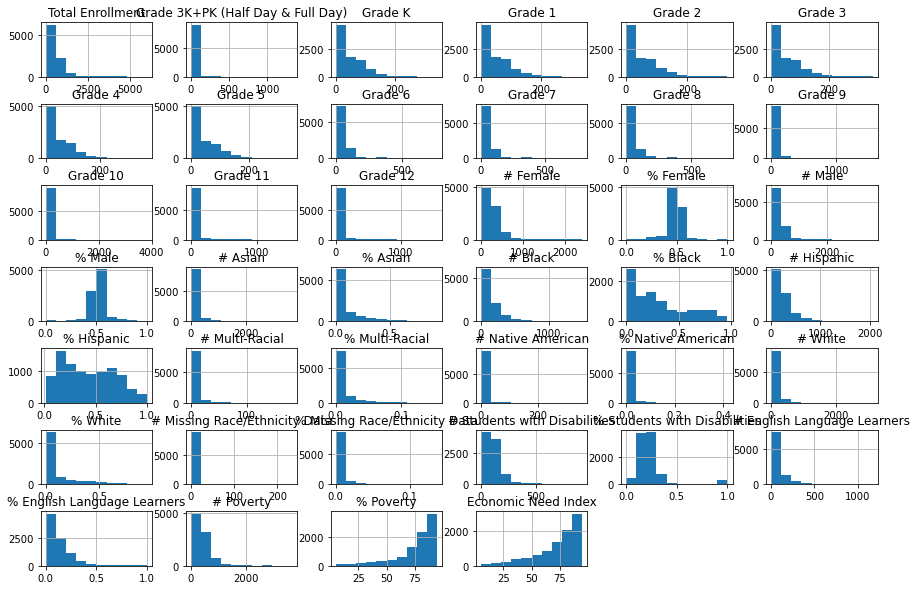

In [365]:
df.hist(figsize = (15,10))
plt.subplots_adjust(hspace=0.5)

From the histograms, it is possible to identify these information

• The higher the grade gets, the less variation of the data. This gives me assumption the amount of people dropping out of school increases as they grow older.

• There's a lot of school that has more than 75% poverty.

• There's a lot of hispanic and black people than other races.

• There's a school that has almost 100% Disability. That school is probably specialized for that group.

# Now, it's important to add columns that can easily tell us which people needs economic need support. 

We can either add it with pd.qcut method which adds quantiles  OR  we can just simply compare it with average economic index and label it as need or no need for economic support.

I chose to label need support and no need support

In [366]:
df['Economic Support']= pd.qcut(df['Economic Need Index'],
                             q = 2, labels = ['No Need','Need Support'])
df_2['Economic Support']= pd.qcut(df_2['Economic Need Index'],
                             q = 2, labels = ['No Need','Need Support'])

In [367]:
print("Mean value for the ones who does not need economic support", df_2[df_2['Economic Support'] == 'No Need']['Economic Need Index'].mean())
print("Mean value for the ones who does need economic support", df_2[df_2['Economic Support'] == 'Need Support']['Economic Need Index'].mean())

Mean value for the ones who does not need economic support 0.609852272727273
Mean value for the ones who does need economic support 0.8382758620689654


# We are going to clean df_2 to feed it to tableau¶

Filter out data with % signs. We only need #

In [368]:
df_2 = df_2[df_2.columns.drop(list(df_2.filter(regex='%')))]
df = df[df.columns.drop(list(df.filter(regex='%')))]

We change the type from object to int because all the numbers are labelled as 01. So after we convert it, it displays as 1. 

Change the type

In [369]:
df['District Number'] = df['District Number'].astype(int)

Prepare the dataframe to join 

In [370]:
Borough_district = df[['Borough','District Number']]

In [371]:
df_2 = df_2.rename({'Administrative District': 'District Number'}, axis = 1)

In [372]:
df_2.head()

,District Number,Year,Total Enrollment,Grade 3K+PK (Half Day & Full Day),Grade K,Grade 1,Grade 2,Grade 3,Grade 4,Grade 5,...,# Hispanic,# Multi-Racial,# Native American,# White,# Missing Race/Ethnicity Data,# Students with Disabilities,# English Language Learners,# Poverty,Economic Need Index,Economic Support
0,1,2016-17,11772,827,850,907,889,859,834,808,...,4855,262,74,2059,27,2555,1065,7265,0.597,No Need
1,1,2017-18,11632,800,851,846,854,862,839,813,...,4887,306,71,2022,29,2528,1016,7682,0.670,No Need
2,1,2018-19,11376,759,799,850,816,838,839,832,...,4695,337,60,2045,38,2597,966,7314,0.661,No Need
3,1,2019-20,11506,960,812,782,848,813,818,831,...,4689,383,63,2056,126,2593,919,7419,0.677,No Need
4,1,2020-21,11021,832,728,762,746,787,775,788,...,4483,427,57,1992,101,2455,915,6960,0.663,No Need


In [373]:
df_2_final = pd.merge(left = Borough_district, right = df_2, how = 'inner', on = 'District Number')

Let's see if df_2's Administrative District is the name as the df's administrative district. If they have the same meaning which is the district name, we can join the two data to give df_2 additional columns such as Borough and School Number.

In [374]:
final_df2['Administrative District'].nunique() == df['District Number'].nunique()

True

I see! We means the two columns mean the same thing. Let's join the two dataframes now. (But not the whole dataframe. Only several Columns from df).

In [380]:
nyc_data_2 = df_2_final
nyc_data = df

Let's store df to nyc_data for simplicity purpose and also create few seperate data for data visualization using tableau.

In [382]:
nyc_data.to_csv(r'../data/nyc_data.csv')
nyc_data_2.to_csv(r'../data/nyc_data_2.csv')